In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv("../../data/kgh_2005_beta.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        4754 non-null   object 
 1   Otwarcie    4754 non-null   float64
 2   Najwyzszy   4754 non-null   float64
 3   Najnizszy   4754 non-null   float64
 4   Zamkniecie  4754 non-null   float64
 5   Wolumen     4754 non-null   float64
 6   Zwrot       4753 non-null   float64
 7   Beta        4664 non-null   float64
dtypes: float64(7), object(1)
memory usage: 297.3+ KB
None


In [4]:
data['Data'] = pd.to_datetime(data['Data'])
data.dropna(inplace=True)

In [5]:
X = np.arange(len(data)).reshape(-1, 1)
y = data['Beta']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [7]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [8]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Ocena modelu
test_loss_rf = model_rf.score(X_test, y_test)
print('Random Forest Test Loss:', test_loss_rf)

Random Forest Test Loss: -0.4845959370012203


In [10]:
predictions_rf = model_rf.predict(X_test)

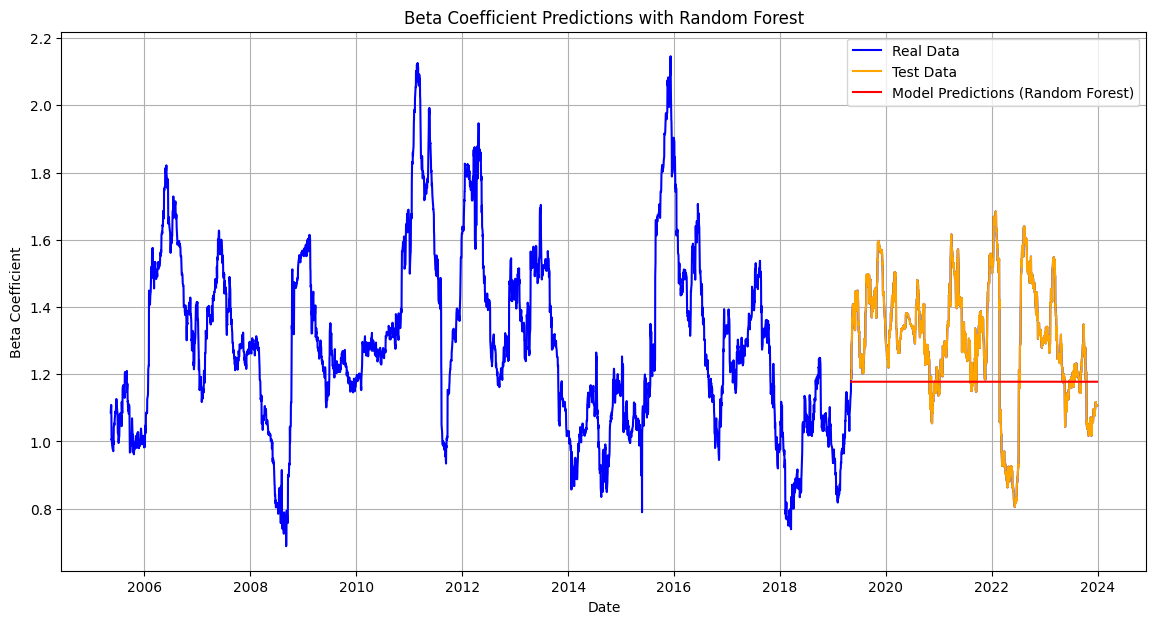

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data['Data'], y, label='Real Data', color='blue', linewidth=1.5)
plt.plot(data['Data'].iloc[X_test.flatten()], y_test, label='Test Data', color='orange', linewidth=1.5)
plt.plot(data['Data'].iloc[X_test.flatten()], predictions_rf, label='Model Predictions (Random Forest)', color='red', linewidth=1.5)
plt.title('Beta Coefficient Predictions with Random Forest')
plt.xlabel('Date')
plt.ylabel('Beta Coefficient')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Ocenianie wyników
mse_rf = mean_squared_error(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
rmse_rf = mean_squared_error(y_test, predictions_rf, squared=False)
r2_rf = r2_score(y_test, predictions_rf)

print("Mean Absolute Error (MAE) for Random Forest:", mae_rf)
print("Squared Mean Absolute Error (RMSE) for Random Forest:", rmse_rf)
print("R-squared (R2) for Random Forest:", r2_rf)

Mean Absolute Error (MAE) for Random Forest: 0.1795762242785657
Squared Mean Absolute Error (RMSE) for Random Forest: 0.215592777745571
R-squared (R2) for Random Forest: -0.4845959370012203
